# Categorical Variables

For today's example let's investigate a dataset conscerning consumer churn for telecoms.  
This dataset comes from kaggle: https://www.kaggle.com/blastchar/telco-customer-churn/home 

Import the dataset below.

import pandas as pd

#### If you haven't already, use pd.plotting.scatter_matrix(df) to see a full distribution of variables and their pairwise correlations.

In [1]:
import pandas as pd
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
print(len(df), df.columns)
df.head()

7043 Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Notice that none of these variables have any correlation. Also note how the scatter plots form geometric rows and columns in a grid fashion. This is due to these variables taking on discrete rather then continuous values. The most extreme of which is the SeniorCitizen feature. If we examine this feature, we will not that there are only 2 associated values: 0 and 1, denoting a binary flag for whether or not an individual is a senior citizen. In cases of categorical variables like this (preferable ones with a limited number of associated values) a heatmap is a wonderful option for exploring the relationship between variables.

# Heatmaps
If we want to explore the relationship between categorical variables, we have no direct way of plotting these on a numeric X and Y axis. Instead, we can use heatmaps which are quiet similar to the pd.plotting.scatter_matrix(df) above. The heatmap will list all categorical variables on the X and Y axis. Each cell will then be the raw or normalized count of observations containing both of these attributes.

Here's a few examples:
![](heatmaps.png)

Let's investigate doing this for our current dataset.

In [2]:
df.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


We first need to choose to variables to compare. Let's examine SeniorCitizen vs InternetService. Perhaps these have an interesting relationship. The first thing we need to do is construct a matrix similar to the visuals shown above.
Let's look at what the values of these two columns are:

In [3]:
print(df.SeniorCitizen.value_counts())

0    5901
1    1142
Name: SeniorCitizen, dtype: int64


In [4]:
print(df.InternetService.value_counts())

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64


Given these values we will need to construct a **heat matrix** like this:

|           |SeniorCitizen0|SeniorCitizen1 |
|:---------:|:------------:| -------------:|
|Fiber Optic|number/percent|number/percent |
|DSL        |number/percent|number/percent |
|NO         |number/percent|number/percent |

In [5]:
df[['SeniorCitizen', 'InternetService']].head()

,SeniorCitizen,InternetService
0,0,DSL
1,0,DSL
2,0,DSL
3,0,DSL
4,0,Fiber optic


# ETL Challenge!  
Extract Transform Load! A lot of data science is transforming and manipulating data.  
How can you transform these two columns into the desired matrix form above?!  

In [6]:
grouped = df.groupby('SeniorCitizen')['InternetService'].value_counts(normalize=True).map(lambda x: round(x,2))
grouped = pd.DataFrame(grouped)
grouped.columns = ['Count']
grouped = grouped.reset_index()
print(grouped.Count.sum())
grouped

2.01


,SeniorCitizen,InternetService,Count
0,0,Fiber optic,0.38
1,0,DSL,0.37
2,0,No,0.25
3,1,Fiber optic,0.73
4,1,DSL,0.23
5,1,No,0.05


## Adding the Visual

In [7]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

ModuleNotFoundError: No module named 'seaborn'

In [8]:
y_labels = heat_matrix.index
x_labels = heat_matrix.columns
data = np.array(heat_matrix)


fig, ax = plt.subplots()
im = ax.imshow(data, cmap='Blues')

# We want to show all ticks...
ax.set_xticks(np.arange(len(x_labels)))
ax.set_yticks(np.arange(len(y_labels)))
# ... and label them with the respective list entries
ax.set_xticklabels(x_labels)
ax.set_yticklabels(y_labels)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(y_labels)):
    for j in range(len(x_labels)):
        value = data[i, j]
        if value < .5:
            text_color = 'black'
        else:
            text_color = 'white'
        text = ax.text(j, i, value,
                       ha="center", va="center", color=text_color)

ax.set_title("Internet Service of age 65+ vs <65")

# Create colorbar
cbar = ax.figure.colorbar(im, ax=ax)
cbar.ax.set_ylabel('Age Group Percentage', rotation=-90, va="bottom")

plt.xlabel('Senior Citizen Flag')
plt.ylabel('Type of Internet Service')
fig.tight_layout()
plt.show()

NameError: name 'heat_matrix' is not defined

In [9]:
#Compare this to our previous bar charts.....
heat_matrix.plot(kind='barh')
plt.title('Internet Service of age 65+ vs under 65')
plt.xlabel('Percentage of Age Bracked')

NameError: name 'heat_matrix' is not defined

## Feature Engineering Categorical Variables to Numerical Binary Flags
Another common technique that we'll need going forward is to turn categorical variables into binary flags in order perform standard algorithms which only accept numerical values. One easy option is to use pandas built in **pd.get_dummies()** method in order to turn a categorical variable into multiple columns, each corresponding to a category along with a binary flag for whether that particular observation is in the given category.

In [10]:
example = df.sample(5, np.random.seed(2)).InternetService # I chose a sample in order to show multiple values. 
#np.random.seed(2) sets it to a specific 'random' number. This ensures that the output is consistent.
example

5806             No
3678            DSL
4060            DSL
1577    Fiber optic
5007             No
Name: InternetService, dtype: object

In [11]:
pd.get_dummies(example).head()

,DSL,Fiber optic,No
5806,0,0,1
3678,1,0,0
4060,1,0,0
1577,0,1,0
5007,0,0,1


# Connecting Representations
Notice how summing these columns is then the same as using the **.value_counts()** method on the original series:

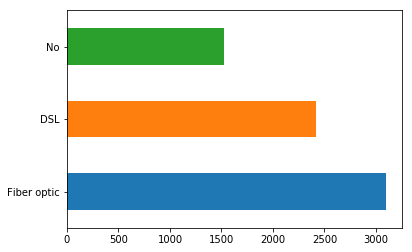

In [12]:
pd.get_dummies(df.InternetService).sum().sort_values(ascending=False).plot(kind='barh')

In [ ]:
df.InternetService.value_counts().plot(kind='barh')